In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

In [8]:
df=pd.read_csv(r"../data/processed/enriched_logon.csv")
df.head()

,user,window,logon_count,logoff_count,unique_pcs,hour,avg_logon,std_logon,avg_pcs,std_pcs,z_logon,z_pcs,night_flag,behavior_score
0,AAB0162,2010-01-04 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281
1,AAB0162,2010-01-04 18:00:00,0,1,1,18,0.499297,0.500351,1.0,0.0,-0.997892,0.0,False,0.399157
2,AAB0162,2010-01-05 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281
3,AAB0162,2010-01-05 18:00:00,0,1,1,18,0.499297,0.500351,1.0,0.0,-0.997892,0.0,False,0.399157
4,AAB0162,2010-01-06 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281


In [9]:
df.shape

(3366264, 14)

In [10]:
df['behavior_score'].describe()

count    3.366264e+06
mean     4.221807e-01
std      2.479288e-01
min      1.910926e-01
25%      3.240445e-01
50%      3.997190e-01
75%      4.002812e-01
max      9.901351e+00
Name: behavior_score, dtype: float64

In [11]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3366264 entries, 0 to 3366263
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user            str    
 1   window          str    
 2   logon_count     int64  
 3   logoff_count    int64  
 4   unique_pcs      int64  
 5   hour            int64  
 6   avg_logon       float64
 7   std_logon       float64
 8   avg_pcs         float64
 9   std_pcs         float64
 10  z_logon         float64
 11  z_pcs           float64
 12  night_flag      bool   
 13  behavior_score  float64
dtypes: bool(1), float64(7), int64(4), str(2)
memory usage: 337.1 MB


In [12]:
X = df[[
  'logon_count',
  'logoff_count',
  'unique_pcs',
  'hour',
  'z_logon',
  'z_pcs',
  'night_flag'
]]

In [13]:
X.head()

,logon_count,logoff_count,unique_pcs,hour,z_logon,z_pcs,night_flag
0,1,0,1,7,1.000703,0.0,False
1,0,1,1,18,-0.997892,0.0,False
2,1,0,1,7,1.000703,0.0,False
3,0,1,1,18,-0.997892,0.0,False
4,1,0,1,7,1.000703,0.0,False


In [14]:
std=StandardScaler()

In [15]:
df_std=std.fit_transform(X)

In [16]:
model=IsolationForest()

In [17]:
pred=model.fit_predict(df_std)

In [18]:
df['behavior_score']

0          0.400281
1          0.399157
2          0.400281
3          0.399157
4          0.400281
             ...   
3366259    0.399719
3366260    0.399719
3366261    0.399719
3366262    0.399719
3366263    0.399719
Name: behavior_score, Length: 3366264, dtype: float64

In [19]:
sample=df.copy()

In [20]:
sample['pred']=pred

In [21]:
sample[['behavior_score', 'pred']].describe()

,behavior_score,pred
count,3.366264e+06,3.366264e+06
mean,4.221807e-01,7.626377e-01
std,2.479288e-01,6.468259e-01
min,1.910926e-01,-1.000000e+00
25%,3.240445e-01,1.000000e+00
50%,3.997190e-01,1.000000e+00
75%,4.002812e-01,1.000000e+00
max,9.901351e+00,1.000000e+00


In [22]:
sample[sample['pred'] == -1][['behavior_score', 'pred']]

,behavior_score,pred
1491,0.554209,-1
1492,0.775453,-1
1525,0.304209,-1
1526,0.775453,-1
1552,0.554209,-1
...,...,...
3361078,0.556547,-1
3361093,2.593057,-1
3361097,0.328206,-1
3361099,3.385644,-1


In [23]:
sample[sample['pred'] == 1][['behavior_score', 'pred']]

,behavior_score,pred
0,0.400281,1
1,0.399157,1
2,0.400281,1
3,0.399157,1
4,0.400281,1
...,...,...
3366259,0.399719,1
3366260,0.399719,1
3366261,0.399719,1
3366262,0.399719,1


In [24]:
sample[sample['behavior_score']==sample['behavior_score'].max()]

,user,window,logon_count,logoff_count,unique_pcs,hour,avg_logon,std_logon,avg_pcs,std_pcs,z_logon,z_pcs,night_flag,behavior_score,pred
807965,DBG0477,2010-03-01 14:00:00,2,1,2,14,0.630687,0.48468,1.000892,0.029867,2.825191,25.060785,False,9.901351,-1


In [25]:
sample['pred'].value_counts()

pred
 1    2966752
-1     399512
Name: count, dtype: int64

In [26]:
379340/2986924*100

12.700021828476386

In [27]:
sample[sample['pred']==-1][['z_logon','z_pcs','hour','night_flag','behavior_score','pred']].head(20)


,z_logon,z_pcs,hour,night_flag,behavior_score,pred
1491,0.760523,0.0,0,True,0.554209,-1
1492,-1.313631,0.0,4,True,0.775453,-1
1525,0.760523,0.0,21,False,0.304209,-1
1526,-1.313631,0.0,5,True,0.775453,-1
1552,0.760523,0.0,0,True,0.554209,-1
1553,-1.313631,0.0,4,True,0.775453,-1
1621,0.760523,0.0,5,True,0.554209,-1
1622,-1.313631,0.0,6,False,0.525453,-1
1680,0.760523,0.0,1,True,0.554209,-1
1681,-1.313631,0.0,3,True,0.775453,-1


manually checking the values to validate the pred value from the model

In [28]:
sample['behavior_score'].corr(sample['pred'])

np.float64(-0.281059686679562)

<h2>Testing performance of various IF models<h2></h2>

In [29]:
contamination = [0.01, 0.03]
n_estimators = [100, 200]
max_samples = ['auto']


In [30]:
model1=IsolationForest(n_estimators=100,contamination=0.01,max_samples='auto')

In [31]:
pred=model1.fit_predict(df_std)

In [32]:
dummy1=df.copy()
dummy1['result of model 1']=pred

In [33]:
dummy1.head()

,user,window,logon_count,logoff_count,unique_pcs,hour,avg_logon,std_logon,avg_pcs,std_pcs,z_logon,z_pcs,night_flag,behavior_score,result of model 1
0,AAB0162,2010-01-04 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281,1
1,AAB0162,2010-01-04 18:00:00,0,1,1,18,0.499297,0.500351,1.0,0.0,-0.997892,0.0,False,0.399157,1
2,AAB0162,2010-01-05 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281,1
3,AAB0162,2010-01-05 18:00:00,0,1,1,18,0.499297,0.500351,1.0,0.0,-0.997892,0.0,False,0.399157,1
4,AAB0162,2010-01-06 07:00:00,1,0,1,7,0.499297,0.500351,1.0,0.0,1.000703,0.0,False,0.400281,1


In [34]:
dummy1['result of model 1'].value_counts()

result of model 1
 1    3332663
-1      33601
Name: count, dtype: int64

In [35]:
33551/(3332712+33551)*100   #checking %anamolies

0.9966838598172514

In [36]:
dummy1[dummy1['result of model 1']==-1][['behavior_score','result of model 1']]

,behavior_score,result of model 1
5585,4.060828,-1
5948,4.060828,-1
6073,4.060828,-1
11083,4.566462,-1
11384,2.369941,-1
...,...,...
3360176,3.385644,-1
3360312,2.593057,-1
3360485,3.385644,-1
3360599,3.385644,-1


In [37]:
dummy1[dummy1['result of model 1']==-1]['behavior_score'].describe()

count    33601.000000
mean         1.705533
std          1.155849
min          0.441093
25%          0.895786
50%          1.452355
75%          2.401928
max          9.901351
Name: behavior_score, dtype: float64

In [38]:
dummy1['behavior_score'].corr(dummy1['result of model 1'])

np.float64(-0.5197558075604778)

In [39]:
dummy1[dummy1['result of model 1']==-1][['z_logon','z_pcs','hour','night_flag','behavior_score','result of model 1']].head(30)

,z_logon,z_pcs,hour,night_flag,behavior_score,result of model 1
5585,0.730230,10.767818,13,False,4.060828,-1
5948,0.730230,10.767818,17,False,4.060828,-1
6073,0.730230,10.767818,17,False,4.060828,-1
11083,0.971508,11.936738,16,False,4.566462,-1
11384,0.895008,5.748392,16,False,2.369941,-1
11445,0.895008,5.748392,16,False,2.369941,-1
11500,0.895008,5.748392,16,False,2.369941,-1
11630,0.895008,5.748392,16,False,2.369941,-1
11810,0.895008,5.748392,16,False,2.369941,-1
11852,0.895008,5.748392,16,False,2.369941,-1


<h2>preparing 2nd test model<h2>

In [40]:
model2=IsolationForest(n_estimators=200,contamination=.03,max_samples='auto')

In [41]:
pred2=model2.fit_predict(df_std)

In [42]:
dummy2=df.copy()
dummy2['pred2']=pred2
dummy2[dummy2['pred2']==-1][['behavior_score','pred2']].describe()

,behavior_score,pred2
count,100980.000000,100980.0
mean,1.123921,-1.0
std,1.107153,0.0
min,0.191093,-1.0
25%,0.467155,-1.0
50%,0.656287,-1.0
75%,1.410903,-1.0
max,9.901351,-1.0


In [43]:
dummy2['behavior_score'].corr(dummy2['pred2'])

np.float64(-0.4977450082015121)

In [44]:
dummy2[dummy2['pred2']==-1][['z_logon','z_pcs','hour','night_flag','behavior_score','pred2']].sample(20)

,z_logon,z_pcs,hour,night_flag,behavior_score,pred2
1592275,0.241780,-0.333662,0,True,0.463494,-1
201392,-1.310872,-0.022552,3,True,0.782242,-1
2945277,-1.398634,-0.352830,21,False,0.682944,-1
778758,0.286201,-0.327028,4,True,0.478940,-1
3004263,2.724216,5.286105,8,False,2.939823,-1
515911,0.186911,-0.355985,4,True,0.449359,-1
1164939,0.213097,-0.315567,23,True,0.445687,-1
1061204,0.245672,2.058571,5,True,1.068769,-1
1857581,0.308220,-0.312297,3,True,0.482592,-1
1740039,3.916040,5.329592,19,False,3.431773,-1


In [45]:
dummy2['pred2'].value_counts()

pred2
 1    3265284
-1     100980
Name: count, dtype: int64

In [46]:
100981/(100981+3265283)*100

2.999794430858661

<h2>Preparing model 3<h2>

In [47]:
model3=IsolationForest(n_estimators=200,contamination=0.02)

In [48]:
pred3=model3.fit_predict(df_std)

In [49]:
dummy3=df.copy()
dummy3['pred3']=pred3
dummy3[dummy3['pred3']==-1][['behavior_score','pred3']].describe()

,behavior_score,pred3
count,67262.000000,67262.0
mean,1.228595,-1.0
std,1.073273,0.0
min,0.441093,-1.0
25%,0.472467,-1.0
50%,0.789710,-1.0
75%,1.565596,-1.0
max,9.901351,-1.0


In [50]:
dummy3['behavior_score'].corr(dummy3['pred3'])

np.float64(-0.4644349160450489)

In [51]:
dummy3[dummy3['pred3']==-1][['z_logon','z_pcs','hour','night_flag','behavior_score','pred3']].sample(20)

,z_logon,z_pcs,hour,night_flag,behavior_score,pred3
1755137,-1.395695,-0.360116,4,True,0.934319,-1
1090070,0.292649,-0.329735,4,True,0.482467,-1
1754832,1.838280,1.759862,17,False,1.351264,-1
1507300,2.665706,6.385797,8,False,3.301312,-1
2023678,0.259746,-0.293861,2,True,0.456750,-1
2601406,0.200673,-0.358231,0,True,0.455650,-1
548826,0.237364,-0.351292,2,True,0.467898,-1
1755868,0.221292,-0.360116,2,True,0.464558,-1
1008446,2.896440,7.124708,8,False,3.652224,-1
3177402,1.874840,4.079785,18,False,2.177861,-1


<h2>ANALYSIS OF VARIOUS MODELS ALTOGETHER   (AUTOMATION CHATGPT CODE)</h2>

In [52]:
param_list = [
    {"n_estimators":100, "contamination":0.01, "max_samples":"auto"},
    {"n_estimators":200, "contamination":0.01, "max_samples":"auto"},
    {"n_estimators":200, "contamination":0.02, "max_samples":"auto"},
    {"n_estimators":200, "contamination":0.01, "max_samples":5000},
    {"n_estimators":300, "contamination":0.01, "max_samples":"auto"}
]


In [53]:
results = []        # to store summary stats
models = []         # optional: store trained models
dfs = []            # store copies of dataframes

for i, params in enumerate(param_list):

    print(f"Running Model {i+1} with params: {params}")

    model = IsolationForest(
        n_estimators = params["n_estimators"],
        contamination = params["contamination"],
        max_samples = params["max_samples"],
        random_state = 42,
        n_jobs = -1
    )

    preds = model.fit_predict(X)

    # Copy dataframe
    dummy = df.copy()

    # Add prediction column
    col_name = f"pred_{i+1}"
    dummy[col_name] = preds

    # Save df
    dfs.append(dummy)
    models.append(model)

    # ---- Analysis ----
    anomaly_mask = (preds == -1)

    anomaly_rate = anomaly_mask.mean()

    min_bbs = dummy.loc[anomaly_mask, "behavior_score"].min()
    max_bbs = dummy.loc[anomaly_mask, "behavior_score"].max()

    corr = dummy["behavior_score"].corr(dummy[col_name])

    results.append({
        "model": i+1,
        "n_estimators": params["n_estimators"],
        "contamination": params["contamination"],
        "max_samples": params["max_samples"],
        "anomaly_rate": anomaly_rate,
        "min_bbs": min_bbs,
        "max_bbs": max_bbs,
        "correlation": corr
    })


Running Model 1 with params: {'n_estimators': 100, 'contamination': 0.01, 'max_samples': 'auto'}


Running Model 2 with params: {'n_estimators': 200, 'contamination': 0.01, 'max_samples': 'auto'}
Running Model 3 with params: {'n_estimators': 200, 'contamination': 0.02, 'max_samples': 'auto'}
Running Model 4 with params: {'n_estimators': 200, 'contamination': 0.01, 'max_samples': 5000}
Running Model 5 with params: {'n_estimators': 300, 'contamination': 0.01, 'max_samples': 'auto'}


In [54]:
results_df = pd.DataFrame(results)
results_df


,model,n_estimators,contamination,max_samples,anomaly_rate,min_bbs,max_bbs,correlation
0,1,100,0.01,auto,0.009994,0.441093,9.901351,-0.585798
1,2,200,0.01,auto,0.010000,0.441093,9.901351,-0.530449
2,3,200,0.02,auto,0.019983,0.441093,9.901351,-0.466693
3,4,200,0.01,5000,0.009997,0.445425,9.901351,-0.754686
4,5,300,0.01,auto,0.009996,0.441093,9.901351,-0.532327


In [55]:
results_df.to_csv('if_tuning_results.csv', index=False)


In [56]:
import joblib

joblib.dump(models[3], '../src/models/if_v2_baseline.pkl')


['../src/models/if_v2_baseline.pkl']

In [57]:
import os
print(os.getcwd())


c:\Users\vinja\Desktop\BehaviorGaurd-AI\notebooks


In [58]:
results_df[3:4]

,model,n_estimators,contamination,max_samples,anomaly_rate,min_bbs,max_bbs,correlation
3,4,200,0.01,5000,0.009997,0.445425,9.901351,-0.754686


In [59]:
# Save the trained model
import joblib
joblib.dump(model, '../src/models/if_v2_baseline.pkl')

# Save metadata
metadata = {
  "model_type": "IsolationForest",
  "version": "v2_baseline",
  "hyperparameters": {
    "n_estimators": 200,
    "contamination": 0.01,
    "max_samples": 5000,
    "random_state": 42
  },
  "features": [
    "logon_count",
    "logoff_count", 
    "unique_pcs",
    "hour",
    "z_logon",
    "z_pcs",
    "night_flag"
  ],
  "training_date": "2026-02-09",
  "dataset": {
    "total_samples": 3366264,
    "anomaly_count": 33630,
    "anomaly_rate": 0.009996
  },
  "performance": {
    "correlation_with_behavior_score": -0.749747,
    "min_behavior_score": 0.449359,
    "max_behavior_score": 9.859316
  },
  "notes": "Conservative 1% contamination chosen to minimize false positives. Strong correlation with rule-based behavior_score validates approach."
}
import json
with open('../src/models/if_v2_baseline_metadata.json', 'w') as f:
    json.dump(metadata, f, indent=2)

<h1>Quick Analysis</h1>

In [60]:
# 1. Load your data (you probably already did this)
df = pd.read_csv('../data/processed/enriched_logon.csv')

# 2. Prepare features (you already did this)
X = df[['logon_count', 'logoff_count', 'unique_pcs', 
        'hour', 'z_logon', 'z_pcs', 'night_flag']]

# 3. Scale (you already did this)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train model (you already did this)
model = IsolationForest(
    n_estimators=200,
    contamination=0.01,
    max_samples=5000,
    random_state=42
)
model.fit(X_scaled)

# 5. Make predictions
predictions = model.predict(X_scaled)

# 6. ADD THIS: Save predictions to dataframe
df['anomaly'] = predictions
df['anomaly_score'] = model.decision_function(X_scaled)

# 7. Save to new file
df.to_csv('../data/processed/enriched_logon_with_predictions.csv', index=False)

print(f"Saved predictions! Anomaly count: {(predictions == -1).sum()}")

Saved predictions! Anomaly count: 33652


In [61]:
# Now this will work:
print("Anomalies by hour:")
print(df[df['anomaly'] == -1]['hour'].value_counts().sort_index())

print("\nTop users with anomalies:")
print(df[df['anomaly'] == -1]['user'].value_counts().head(10))

Anomalies by hour:
hour
0     2717
1     1127
2      705
3      648
4      676
5      818
6      989
7     3596
8     2595
9      330
10     367
11     822
12    1349
13    1227
14     453
15     731
16    1589
17    1808
18    2207
19    1007
20     746
21     817
22    1160
23    5168
Name: count, dtype: int64

Top users with anomalies:
user
TAM3048    293
RCF0044    286
CAM3050    260
DNS1758    255
CND3037    223
MTS0465    218
DNS1768    216
BMM0462    212
CCB3055    210
JRR0459    209
Name: count, dtype: int64


In [62]:
# You should check:
# - What's their role? (Executive? IT Admin?)
# - What's their tenure? (New or experienced?)
# - What's their contextual risk_score from V0?

# Merge with user profiles:
top_users = ['TAM3048', 'RCF0044', 'CAM3050', 'DNS1758', 'CND3037']
user_profiles = pd.read_csv('../data/processed/user_profiles_v0.csv')
user_profiles[user_profiles['user_id'].isin(top_users)]

,employee_name,user_id,email,role,projects,business_unit,functional_unit,department,team,supervisor,start_date,end_date,tenure_days,is_new,has_supervisor,has_project,is_previliged,rare_role,risk_score
698,dennis nero schmidt,DNS1758,dennis.nero.schmidt@dtaa.com,itadmin,unassigned,1,1 - adminstration,5 - security,6 - electronicsecurity,hedda indira savage,2009-12-01,2011-06-01,547 days,0,1,0,1,0,0.45
1044,richard cruz frederick,RCF0044,richard.cruz.frederick@dtaa.com,itadmin,unassigned,1,1 - adminstration,5 - security,2 - electronicsecurity,carl garrett morgan,2009-12-01,2011-06-01,547 days,0,1,0,1,0,0.45
1241,casey nathaniel decker,CND3037,casey.nathaniel.decker@dtaa.com,itadmin,unassigned,1,1 - adminstration,5 - security,10 - electronicsecurity,lois rhonda snow,2009-12-01,2011-06-01,547 days,0,1,0,1,0,0.45
2479,cairo aaron mcgee,CAM3050,cairo.aaron.mcgee@dtaa.com,itadmin,project 32,1,1 - adminstration,5 - security,10 - electronicsecurity,lois rhonda snow,2009-12-01,2011-06-01,547 days,0,1,1,1,0,0.30
3801,tara adara miranda,TAM3048,tara.adara.miranda@dtaa.com,itadmin,project 20,1,1 - adminstration,5 - security,10 - electronicsecurity,lois rhonda snow,2009-12-01,2011-06-01,547 days,0,1,1,1,0,0.30


In [63]:
# Calculate anomaly rate per user:
for user in top_users:
    total = len(df[df['user'] == user])
    anomalies = len(df[(df['user'] == user) & (df['anomaly'] == -1)])
    rate = anomalies / total * 100
    print(f"{user}: {anomalies}/{total} = {rate:.2f}% anomaly rate")

TAM3048: 293/2540 = 11.54% anomaly rate
RCF0044: 286/2207 = 12.96% anomaly rate
CAM3050: 260/1961 = 13.26% anomaly rate
DNS1758: 255/2534 = 10.06% anomaly rate
CND3037: 223/1959 = 11.38% anomaly rate


## V2 Key Findings

1. Anomaly Rate per User:
   - Top user (TAM3048): 293 anomalies out of 2540 total events = 11.54%
   - Is this suspicious or legitimate power user?
    

2. Temporal Patterns:
   - 23% of anomalies occur at 11 PM - 12 AM
   - Hypothesis: [Night shift? Suspicious activity?]

3. Feature Importance:
   - Which features drive anomalies? (logon_count? z_scores?)
   - Average z_logon for anomalies vs normal?

4. Validation:
   - Manually inspected [N] anomalies
   - [X] appear suspicious, [Y] appear legitimate

5. Decision for V3:
   - Will implement [role-based / time-based / clustering] approach
   - Rationale: [Based on findings above]

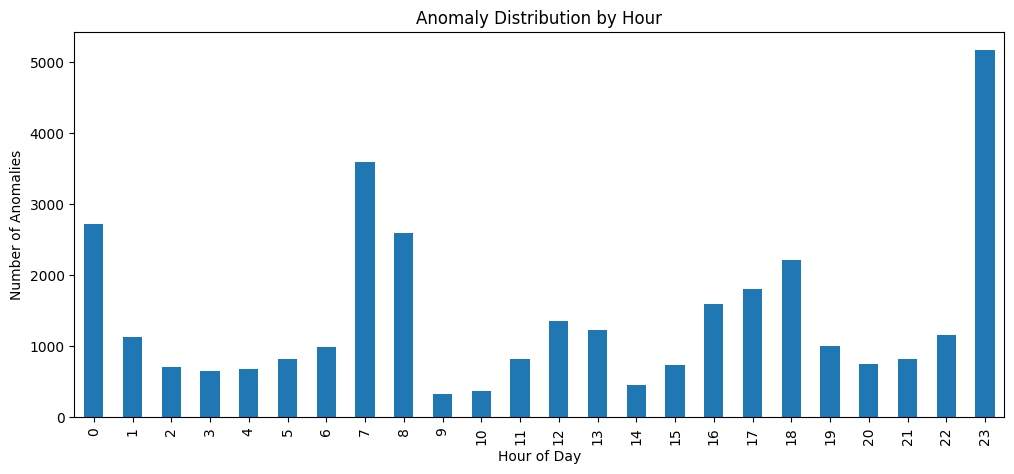

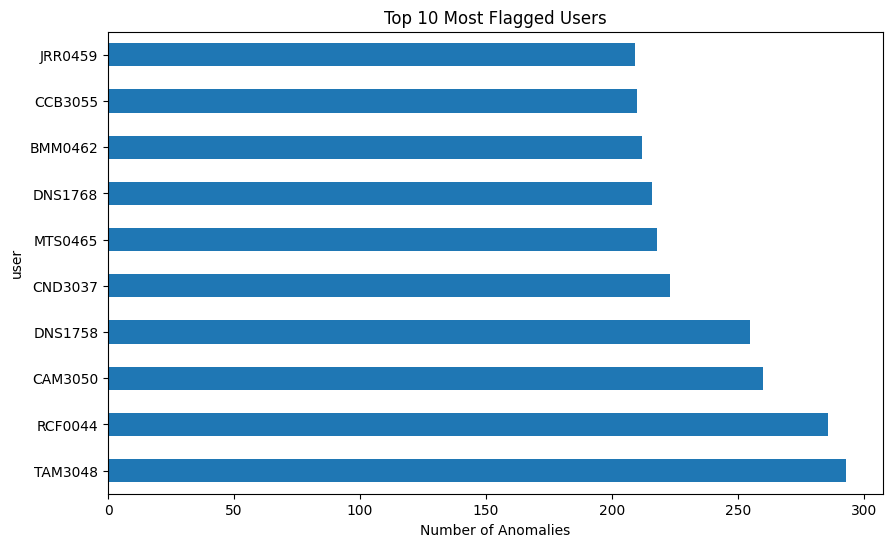

In [64]:
import matplotlib.pyplot as plt

# 1. Anomaly distribution by hour
plt.figure(figsize=(12, 5))
df[df['anomaly'] == -1]['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Anomaly Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Anomalies')
plt.savefig('../docs/v2_anomaly_by_hour.png')
plt.show()

# 2. Top 10 users
top_users_counts = df[df['anomaly'] == -1]['user'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_users_counts.plot(kind='barh')
plt.title('Top 10 Most Flagged Users')
plt.xlabel('Number of Anomalies')
plt.savefig('../docs/v2_top_users.png')
plt.show()